# Getting Started

Load data here: https://www.kaggle.com/wendykan/lending-club-loan-data

In this notebook we split the data between testing and training before moving to wrangling.

In [1]:
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
#download in chunks
df_raw = utils.chunk_loader('data/loan.csv', index_col=None)

#make datettime object
df_raw['issue_d'] = pd.to_datetime(df_raw['issue_d'])

df_raw.sort_values(by='issue_d',
                   axis=0,
                   ascending=True,
                   inplace=True,
                   na_position='first')

#check data
df_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2142001,NaN,NaN,1400,1400,475.0,36 months,10.91,45.78,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142017,NaN,NaN,2525,2525,225.0,36 months,9.33,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142016,NaN,NaN,1000,1000,0.0,36 months,9.64,32.11,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142015,NaN,NaN,3500,3500,225.0,36 months,10.28,113.39,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142014,NaN,NaN,6500,6500,0.0,36 months,9.64,208.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


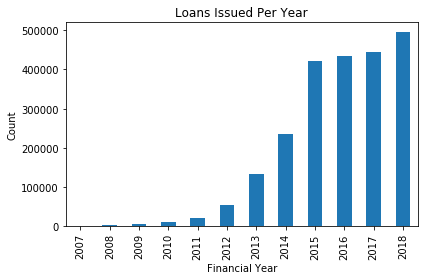

In [14]:
df_raw['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.savefig("plots/loans_per_year.png")
plt.tight_layout()

plt.show()

We will take a note here to address the case of future leak. Let us see how many loans we issued each year. For the sake of this exerise let us assume we have all data points until the last 10%.

In [4]:
#set fraction
frac = 0.9

#get fractions and make deep copy
df_train = df_raw.loc[df_raw['issue_d']  < df_raw['issue_d'].quantile(frac)]
df_test =  df_raw.loc[df_raw['issue_d'] >= df_raw['issue_d'].quantile(frac)]


In [5]:
df_train.shape

(2004062, 145)

In [6]:
df_test.shape

(256606, 145)

In [7]:
#check against time leak
assert df_train['issue_d'].max() < df_test['issue_d'].min()

#check if any overlap in split
assert list(set(df_test.index.values) & set(df_train.index.values)) == []

#make sure we got everything
assert df_test.shape[0] + df_train.shape[0] == df_raw.shape[0]

In [8]:
#save as compressed zipped files to save space
df_test.to_csv('data/df_test.csv.zip')
df_train.to_csv('data/df_train.csv.zip')